In [186]:
import pandas as pd
df=pd.read_csv("ipl_2025_auction_players.csv")

In [188]:
df.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35


In [190]:
df.tail()

,Players,Team,Type,Base,Sold
618,Vijay Yadav,-,AR,0.30,TBA
619,Jofra Archer,RR,BOWL,2.00,12.50
620,Saurabh Netravalkar,-,BOWL,0.30,TBA
621,Hardik Tamore,-,WK,0.30,TBA
622,Daryl Mitchell,-,AR,2.00,Unsold


In [192]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


In [194]:
df.describe()

,Players,Team,Type,Base,Sold
count,623,623,623,623,623
unique,620,11,4,9,72
top,Daryl Mitchell,-,BOWL,0.30,TBA
freq,2,395,216,322,293


In [196]:
df.columns

Index(['Players', 'Team', 'Type', 'Base', 'Sold'], dtype='object')

In [198]:
df['Sold']=df['Sold'].fillna('TBA')

In [200]:
x=df.isnull
print(x)

<bound method DataFrame.isnull of                  Players Team  Type  Base    Sold
0            Virat Kohli  RCB   BAT     -   21.00
1          Rajat Patidar  RCB   BAT     -   11.00
2             Yash Dayal  RCB  BOWL     -    5.00
3         Jasprit Bumrah   MI  BOWL     -   18.00
4       Suryakumar Yadav   MI   BAT     -   16.35
..                   ...  ...   ...   ...     ...
618          Vijay Yadav    -    AR  0.30     TBA
619         Jofra Archer   RR  BOWL  2.00   12.50
620  Saurabh Netravalkar    -  BOWL  0.30     TBA
621        Hardik Tamore    -    WK  0.30     TBA
622       Daryl Mitchell    -    AR  2.00  Unsold

[623 rows x 5 columns]>


In [202]:
df.isnull() #to the check null values

,Players,Team,Type,Base,Sold
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
618,False,False,False,False,False
619,False,False,False,False,False
620,False,False,False,False,False
621,False,False,False,False,False


In [204]:
df['sold_numeric']=pd.to_numeric(df['Sold'],errors='coerce')

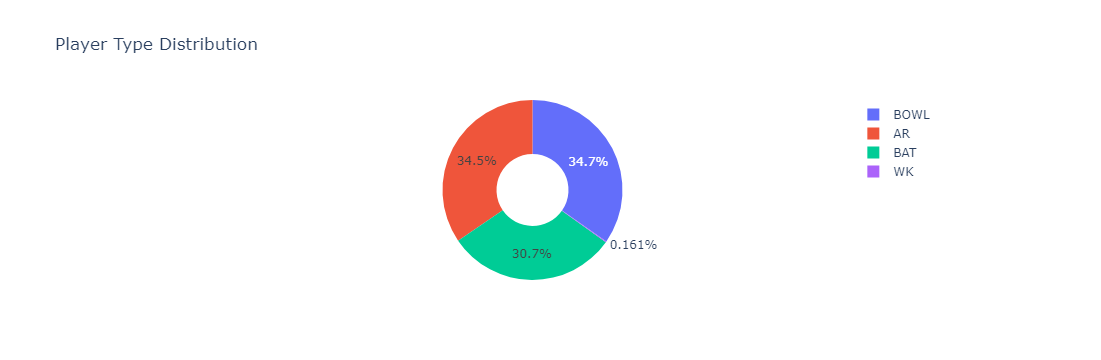

In [206]:
import plotly.express as px
import plotly.graph_objects as go

player_type_dist = df['Type'].value_counts()
fig1=px.pie(
    names=player_type_dist.index,
    values=player_type_dist.values,
    title="Player Type Distribution",
    hole=0.4
)
# fig1.update_layout(
    # title_font=dict(size=24, family='Times New Romen', color='darkblue'),
    
# )
fig1.show(render='iframe_connected')

In [208]:
o=df.isnull
print(o)

<bound method DataFrame.isnull of                  Players Team  Type  Base    Sold  sold_numeric
0            Virat Kohli  RCB   BAT     -   21.00         21.00
1          Rajat Patidar  RCB   BAT     -   11.00         11.00
2             Yash Dayal  RCB  BOWL     -    5.00          5.00
3         Jasprit Bumrah   MI  BOWL     -   18.00         18.00
4       Suryakumar Yadav   MI   BAT     -   16.35         16.35
..                   ...  ...   ...   ...     ...           ...
618          Vijay Yadav    -    AR  0.30     TBA           NaN
619         Jofra Archer   RR  BOWL  2.00   12.50         12.50
620  Saurabh Netravalkar    -  BOWL  0.30     TBA           NaN
621        Hardik Tamore    -    WK  0.30     TBA           NaN
622       Daryl Mitchell    -    AR  2.00  Unsold           NaN

[623 rows x 6 columns]>


In [210]:
df.columns

Index(['Players', 'Team', 'Type', 'Base', 'Sold', 'sold_numeric'], dtype='object')

In [212]:
df['Team']=df['Team'].replace('-','non selected players')
print(df)

                 Players                  Team  Type  Base    Sold  \
0            Virat Kohli                   RCB   BAT     -   21.00   
1          Rajat Patidar                   RCB   BAT     -   11.00   
2             Yash Dayal                   RCB  BOWL     -    5.00   
3         Jasprit Bumrah                    MI  BOWL     -   18.00   
4       Suryakumar Yadav                    MI   BAT     -   16.35   
..                   ...                   ...   ...   ...     ...   
618          Vijay Yadav  non selected players    AR  0.30     TBA   
619         Jofra Archer                    RR  BOWL  2.00   12.50   
620  Saurabh Netravalkar  non selected players  BOWL  0.30     TBA   
621        Hardik Tamore  non selected players    WK  0.30     TBA   
622       Daryl Mitchell  non selected players    AR  2.00  Unsold   

     sold_numeric  
0           21.00  
1           11.00  
2            5.00  
3           18.00  
4           16.35  
..            ...  
618           NaN  

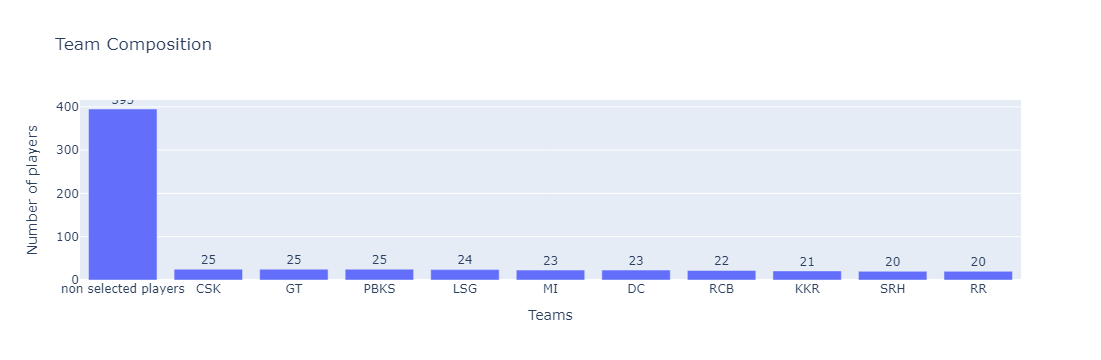

In [214]:
team_dist = df['Team'].value_counts()
fig2=px.bar(
   x=team_dist.index,
   y=team_dist.values,
    title="Team Composition",
    labels={'x' :'Teams','y':'Number of players'},
    text=team_dist.values,
    height = 500,
)
fig2.update_traces(textposition='outside')
fig2.show(render='iframe_connected')

In [216]:
df1=pd.read_csv('ipl_2025_auction_players.csv')
df1

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35
...,...,...,...,...,...
618,Vijay Yadav,-,AR,0.30,TBA
619,Jofra Archer,RR,BOWL,2.00,12.50
620,Saurabh Netravalkar,-,BOWL,0.30,TBA
621,Hardik Tamore,-,WK,0.30,TBA


In [218]:
df1 = df1[~df1['Sold'].str.contains('TBA', na=False)]
df1 = df1[~df1['Sold'].str.contains('Unsold', na=False)]
# df = df[df['Sold'].notna()]  # Removes rows with NaN
df1 = df1[df1['Sold'] != '']    # Removes rows with empty strings
print(df)


                 Players                  Team  Type  Base    Sold  \
0            Virat Kohli                   RCB   BAT     -   21.00   
1          Rajat Patidar                   RCB   BAT     -   11.00   
2             Yash Dayal                   RCB  BOWL     -    5.00   
3         Jasprit Bumrah                    MI  BOWL     -   18.00   
4       Suryakumar Yadav                    MI   BAT     -   16.35   
..                   ...                   ...   ...   ...     ...   
618          Vijay Yadav  non selected players    AR  0.30     TBA   
619         Jofra Archer                    RR  BOWL  2.00   12.50   
620  Saurabh Netravalkar  non selected players  BOWL  0.30     TBA   
621        Hardik Tamore  non selected players    WK  0.30     TBA   
622       Daryl Mitchell  non selected players    AR  2.00  Unsold   

     sold_numeric  
0           21.00  
1           11.00  
2            5.00  
3           18.00  
4           16.35  
..            ...  
618           NaN  

In [220]:
df1

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35
...,...,...,...,...,...
573,Eshan Malinga,SRH,BOWL,0.30,1.20
601,Tripurana Vijay,DC,AR,0.30,0.30
609,Madhav Tiwari,DC,AR,0.30,0.40
616,Vignesh Puthur,MI,AR,0.30,0.30


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Players       623 non-null    object 
 1   Team          623 non-null    object 
 2   Type          623 non-null    object 
 3   Base          623 non-null    object 
 4   Sold          623 non-null    object 
 5   sold_numeric  227 non-null    float64
dtypes: float64(1), object(5)
memory usage: 29.3+ KB


In [224]:
df1['Sold']=df1['Sold'].astype(float)

In [226]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 0 to 619
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Players  227 non-null    object 
 1   Team     227 non-null    object 
 2   Type     227 non-null    object 
 3   Base     227 non-null    object 
 4   Sold     227 non-null    float64
dtypes: float64(1), object(4)
memory usage: 10.6+ KB


In [228]:
df1['Sold']=df1['Sold']*10_000_000
df1.describe()

,Sold
count,2.270000e+02
mean,5.207489e+07
std,6.028455e+07
min,3.000000e+06
25%,7.500000e+06
50%,2.400000e+07
75%,8.875000e+07
max,2.700000e+08


<Axes: xlabel='Team', ylabel='Sold'>

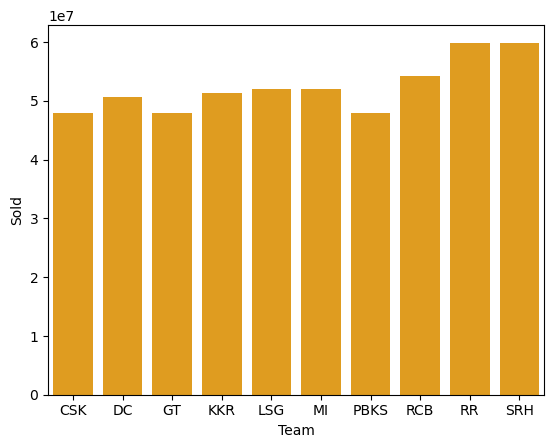

In [230]:
import seaborn as sns

x=df1.groupby('Team')['Team'].first()
y=df1.groupby('Team')['Sold'].mean()
height=1500
# p=['Orange']
sns.barplot(x=x,y=y,color='Orange')  

In [232]:
Base_dist=df['Base'].value_counts().sort_index()
fig3=px.bar(
  x=Base_dist.index,
  y=Base_dist.values,
  title="Team Composition",
  labels={'x':'Base Price','y':'Number of Players'},
   text=Base_dist.values
)
fig3.update_traces(textposition='outside')
fig3.show(renderer='iframe_connected')

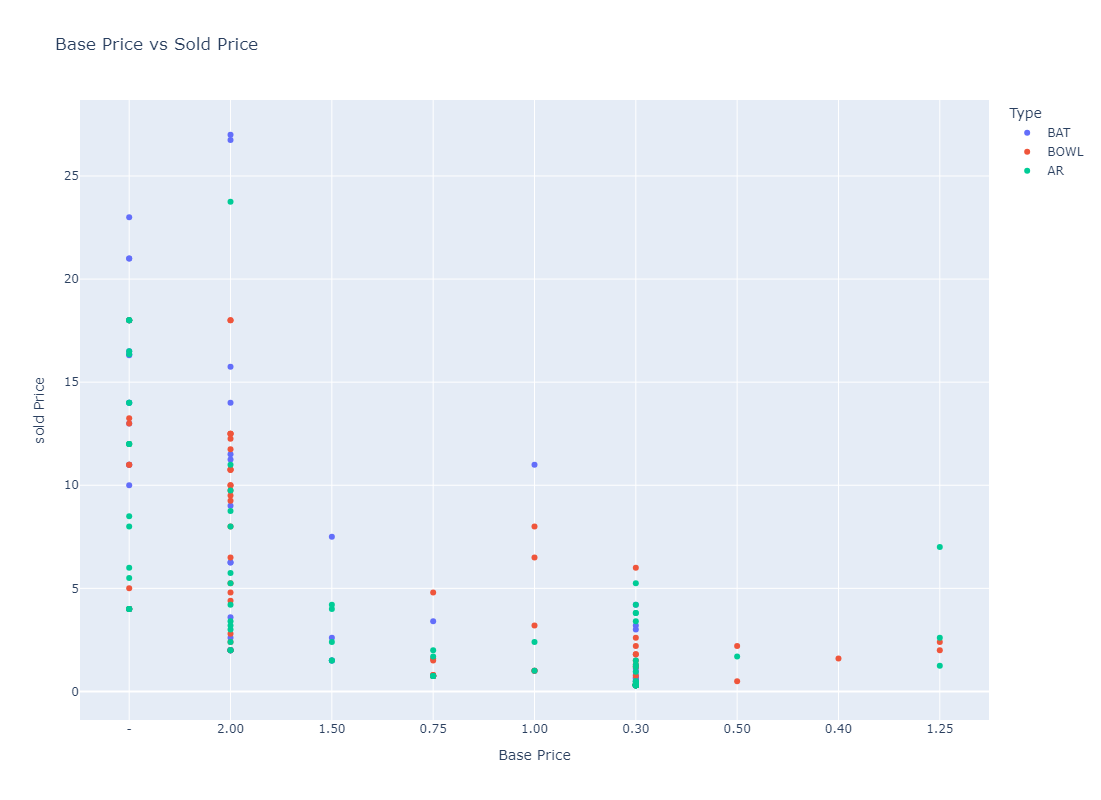

In [234]:
fig4 = px.scatter(
    df.dropna(subset=['sold_numeric']),
    x='Base',
    y='sold_numeric',
    color='Type',
    title='Base Price vs Sold Price',
    labels={'Base':'Base Price','sold_numeric':'sold Price'},
    height=800

)
fig4.show(render='iframe_connected')


In [236]:
df= df[~df['Sold'].str.contains('TBA', na=False)]
df = df[~df['Sold'].str.contains('Unsold', na=False)]
# df = df[df['Sold'].notna()]  # Removes rows with NaN
# df = df[df['Sold'] != '']    # Removes rows with empty strings
print(df)
df['Sold']=df['Sold'].astype(float)


              Players Team  Type  Base   Sold  sold_numeric
0         Virat Kohli  RCB   BAT     -  21.00         21.00
1       Rajat Patidar  RCB   BAT     -  11.00         11.00
2          Yash Dayal  RCB  BOWL     -   5.00          5.00
3      Jasprit Bumrah   MI  BOWL     -  18.00         18.00
4    Suryakumar Yadav   MI   BAT     -  16.35         16.35
..                ...  ...   ...   ...    ...           ...
573     Eshan Malinga  SRH  BOWL  0.30   1.20          1.20
601   Tripurana Vijay   DC    AR  0.30   0.30          0.30
609     Madhav Tiwari   DC    AR  0.30   0.40          0.40
616    Vignesh Puthur   MI    AR  0.30   0.30          0.30
619      Jofra Archer   RR  BOWL  2.00  12.50         12.50

[227 rows x 6 columns]


C:\Users\binuk\AppData\Local\Temp\ipykernel_15616\3852874625.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




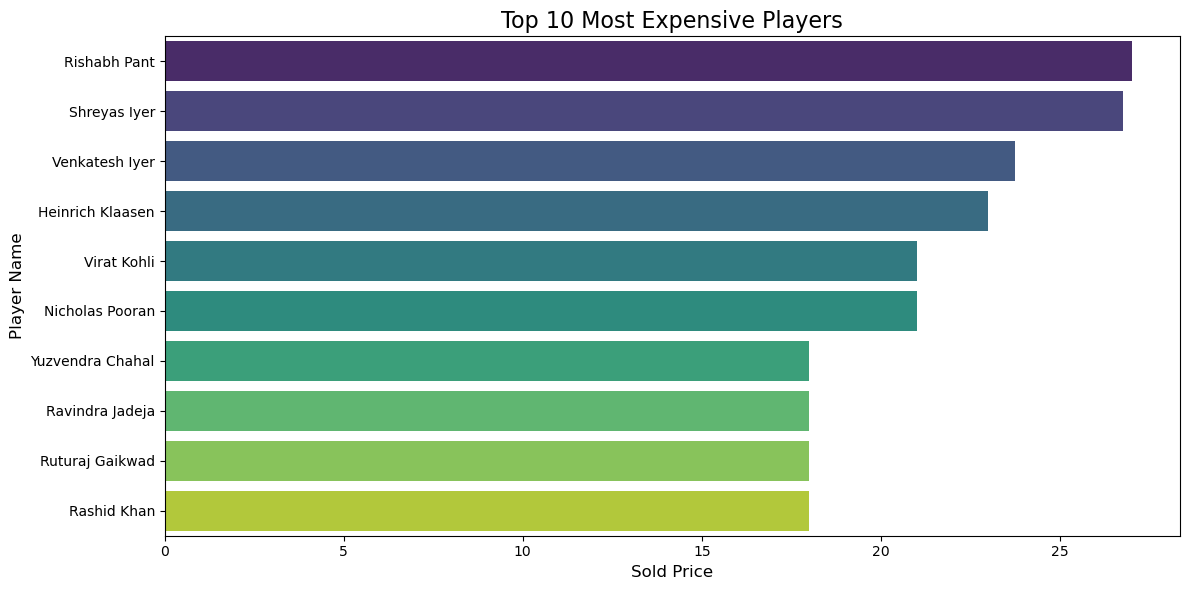

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
top_players =df[['Players','Sold']].sort_values(by='Sold',ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x ='Sold',
            y ='Players',
            data=top_players,
            palette='viridis')
plt.title('Top 10 Most Expensive Players',fontsize=16)
plt.xlabel('Sold Price',fontsize=12)
plt.ylabel('Player Name',fontsize=12)
plt.tight_layout()
plt.show()
            